# FRAUD DETECTION 

## Problem Description

This project focuses on detecting whether a payment is fraudulent or not by applying several machine learning techniques. It aims is not only to build and evaluate models but also extract valuable insights from pattern observed in the dataset. Dataset includes all transactions during 2023

Additionally, the portfolio includes tuning techniques such as Recursive Feature Elimination (RFE) and GridSearch Cross-Validation to optimize hyperparameters and improve model accuracy. After evaluating the models, the performance comparison between the three will help identify which one delivers the best results for fraud detection.

## Feature Description
- **TransactionNumber:** The unique identifier for each transaction in the test dataset.
- **UserID**: A unique identifier for each user who made the transaction.
- **Age**: The age of the user.
- **Gender**: The gender of the user (e.g., Male, Female, etc.).
- **Occupation**: The user’s occupation.
- **EducationLevel**: The user’s highest level of education.
- **MaritalStatus**: The marital status of the user.
- **NumDependents**: The number of dependents the user has.
- **Income**: The user's annual income.
- **Expenditure**: The user's spending or expenditure amount.
- **GiftsTransaction**: The user's gift spending amount.
- **TransactionDate**: The date when the transaction occurred.
- **TransactionTime**: The time when the transaction took place.
- **TransactionAmount**: The monetary value of the transaction.
- **MerchantID**: A unique identifier for the merchant or business where the transaction occurred.
- **TransactionType**: The type of transaction
- **TransactionLocation**: The geographic location where the transaction occurred.
- **DeviceType**: The type of device used to complete the transaction (e.g., mobile, desktop).
- **Latitude**: The latitude coordinate of the user's local address (Not transaction location).
- **Longitude**: The longitude coordinate of the user's local address (Not transaction location).
- **Email**: The user’s email address.
- **Terrorism**: A binary flag indicating potential links to terrorism-related activities.
- **UserTenure**: The length of time the user has held an account with the bank in months.
- **IsFraud**: The target variable, indicating whether the transaction is fraudulent (1) or legitimate (0).

In [1]:
# Load all the needed package
import pandas as pd 
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
# Load the data set 
data = pd.read_csv('/Users/macbook/Documents/GitHub/Fraud Detection/fraud_detection.csv')
data.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0


In [3]:
print('Shape of the dataset:' , data.shape)

# Check if is there any null value in the data set 
data.isnull().sum()

Shape of the dataset: (10966, 24)


TransactionNumber       0
UserID                  0
Age                     0
Gender                  0
Occupation              0
EducationLevel          0
MaritalStatus           0
NumDependents           0
Income                  0
Expenditure             0
GiftsTransaction        0
TransactionDate         0
TransactionTime         0
TransactionAmount       0
MerchantID              0
TransactionType         0
TransactionLocation     0
DeviceType              0
Latitude               43
Longitude              43
EmailDomain             0
Terrorism               0
UserTenure              0
IsFraud                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    10966 non-null  int64  
 1   UserID               10966 non-null  int64  
 2   Age                  10966 non-null  int64  
 3   Gender               10966 non-null  object 
 4   Occupation           10966 non-null  object 
 5   EducationLevel       10966 non-null  object 
 6   MaritalStatus        10966 non-null  object 
 7   NumDependents        10966 non-null  int64  
 8   Income               10966 non-null  object 
 9   Expenditure          10966 non-null  object 
 10  GiftsTransaction     10966 non-null  object 
 11  TransactionDate      10966 non-null  object 
 12  TransactionTime      10966 non-null  object 
 13  TransactionAmount    10966 non-null  object 
 14  MerchantID           10966 non-null  object 
 15  TransactionType      10966 non-null 

In [5]:
data.describe(include = 'all')

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
count,10966.000000,10966.000000,10966.000000,10966,10966,10966,10966,10966.000000,10966,10966,...,10966,10966,10966,10966,10923.000000,10923.000000,10966,10966,10966.000000,10966.000000
unique,NaN,NaN,NaN,9,4,4,4,NaN,6546,7709,...,8,4,34,8,NaN,NaN,4395,2,NaN,NaN
top,NaN,NaN,NaN,Male,Professional,Bachelor,Married,NaN,AU$ 125722.27,AU$ 24202.02,...,M001,Purchase,Canberra,Mobile,NaN,NaN,jharris@gmail.com,False,NaN,NaN
freq,NaN,NaN,NaN,4887,5384,4367,5366,NaN,7,6,...,1406,5440,1380,4893,NaN,NaN,14,7623,NaN,NaN
mean,9117.500091,2483.885282,2751.845887,NaN,NaN,NaN,NaN,1.995714,NaN,NaN,...,NaN,NaN,NaN,NaN,-30.363255,141.254786,NaN,NaN,60.786157,0.364308
std,5293.669640,1429.402615,9730.988917,NaN,NaN,NaN,NaN,1.408035,NaN,NaN,...,NaN,NaN,NaN,NaN,6.962819,11.268395,NaN,NaN,34.254477,0.481257
min,1.000000,1.000000,-68.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,-41.640079,-112.026050,NaN,NaN,1.000000,0.000000
25%,4516.250000,1253.000000,26.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,-37.020100,142.702789,NaN,NaN,31.000000,0.000000
50%,9120.500000,2471.000000,34.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,-31.840233,144.964600,NaN,NaN,61.000000,0.000000
75%,13710.750000,3727.000000,43.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,-25.042261,145.612793,NaN,NaN,90.000000,1.000000


## DATA CLEANING

In [6]:
# with null value of longtitude and latitude, we will replace by the median 
data['Longitude'].fillna(data['Longitude'].median(), inplace=True)
data['Latitude'].fillna(data['Latitude'].median(), inplace=True)

#### For Age Column 

In [7]:
# For age column 
data['Age'].unique()

array([   37,    34,    25,    38,    32,    18,    39,    21,    52,
          56,    41,   -24,    31,    35,    30,    29,    36,    28,
          42,    55,    40, 29000,    48, 24000,   -43,    26,    53,
         -29,    27,    43,    44,    33, 27000,    24,   -47,    19,
         -49,    51,    61, 42000,   -23,    46,    50,   -30,   -39,
       36000, 26000,   -26, 31000,    23,   -34,   -21,    47,    49,
         -45, 34000, 33000,   -40,   -31,   -32,   -18,   -38,   -42,
       47000,    54,    45,    20,    60, 28000,   -36, 45000, 49000,
       41000, 40000, 22000, 32000,    22, 39000,   -44,   -28, 55000,
       38000,   -27, 18000,    57, 35000, 21000,   -41, 37000,   -33,
          63,   -50,   -37,   -35, 25000,   -51,    59, 57000, 54000,
       61000, 46000,   -48,   -56, 20000,   -19,    58,   -46, 30000,
       48000, 60000, 43000, 53000, 23000,   -25, 50000,   -54,   -53,
       44000,   -52,   -68, 67000, 56000,    62,    66,   -55,   -22,
       58000, 52000,

In [8]:
# create function to remove if data is 5 digits, I remove until 2 digits only 
# and if that is the negative number, change it to positive 
def shorten_age(age):
    if abs(age) >= 1000 : 
        return int(str(age)[:2])   
    else: 
        return age 

# function to positive age 
def positive_age(age):
    if age < 0: 
        return -age
    else:
        return age
    
# Apply to the [Age]
data['Age'] = data['Age'].apply(shorten_age).apply(positive_age)
print(data['Age'].unique())

[37 34 25 38 32 18 39 21 52 56 41 24 31 35 30 29 36 28 42 55 40 48 43 26
 53 27 44 33 47 19 49 51 61 23 46 50 45 54 20 60 22 57 63 59 58 68 67 62
 66 64]


#### For Device Type column, combine into 3 different types: Mobile, Desktop, Tablet

In [9]:
data['DeviceType'].unique()

array(['Mobile', 'iphone 15', 'Tablet', 'Desktop', 'android',
       'smartphone', 'mob', 'galaxys7'], dtype=object)

In [10]:
data['DeviceType'] = data['DeviceType'].replace({'mob': 'Mobile', 'iphone 15': 'Mobile', 'android' : 'Mobile', 'smartphone' : 'Mobile', 'mob' : 'Mobile', 'galaxys7' : 'Mobile'})
data['DeviceType'].unique()
data['DeviceType'].value_counts()

DeviceType
Mobile     6516
Desktop    3325
Tablet     1125
Name: count, dtype: int64

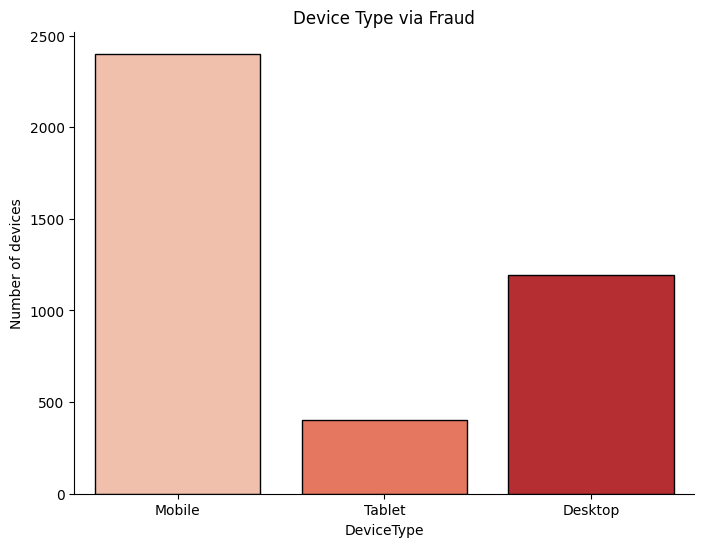

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceType', data=data[data['IsFraud'] == 1], palette = 'Reds', legend = False, edgecolor='black' )
plt.title('Device Type via Fraud')
plt.xlabel('DeviceType')
plt.ylabel('Number of devices')
sns.despine()
plt.show()

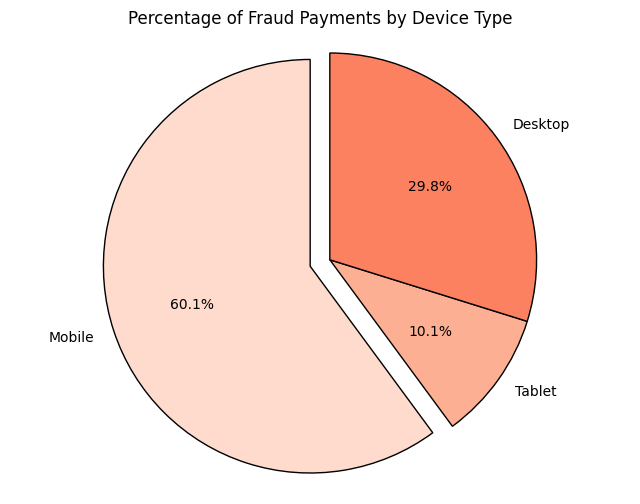

In [12]:
fraud_data = data[data['IsFraud'] == 1]

# Count the number of fraud payments by device type
device_counts = fraud_data['DeviceType'].value_counts()

# Define the labels and sizes for the pie chart
labels = ['Mobile', 'Tablet', 'Desktop']
sizes = [
    device_counts.get('Mobile', 0),
    device_counts.get('Tablet', 0),
    device_counts.get('Desktop', 0)
]

palette_color = sns.color_palette('Reds') 
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = palette_color,  explode=(0.1, 0, 0),  wedgeprops={'edgecolor': 'black'} )
plt.title('Percentage of Fraud Payments by Device Type')
plt.axis('equal')
plt.show()

### Comment: 
- Most of the fraud payment was made from Mobile Decive (around 2500 devices), followed by Desktop (around 1250 devices), and the less popular is Tablet.
- From the pie chart, we can see that 60.1% of fraud payments were made from Mobile device, 29.8% payments made from desktop and there is only 10.1% payments made from Tablet

#### For gender, we change into numerical value

In [13]:
data['Gender'].unique()

array(['Female', 'Male', 'he', 'isnotfemale', 'fem', 'she', 'man',
       'woman', 'isnotmale'], dtype=object)

In [14]:
data['Gender'].replace({'he' : 'Male', 'isnotfemale' : 'Male', 'man' : 'Male', 'he' : 'Male'}, inplace = True)
data['Gender'].replace({'fem' : 'Female', 'woman': 'Female', 'fem' : 'Female', 'she': 'Female', 'isnotmale' : 'Female'}, inplace = True)
data['Gender'].value_counts()

Gender
Male      5710
Female    5256
Name: count, dtype: int64

In [15]:
# Because gender is nominal categorical data, we use one hot encoding 
data = pd.get_dummies(data, columns = ['Gender'], prefix = ['Gender'])

#### Convert categorical data

In [16]:
# Replace inconsistent values
data['Income'] = data['Income'].str.replace('$','').str.replace( 'AU$' , '').str.replace('AUD' ,'').str.replace('AU', '').astype(float)
print(data['Income'].describe())

count     10966.000000
mean      71053.173947
std       31337.747245
min        5229.820000
25%       47117.830000
50%       66068.680000
75%       86905.020000
max      200354.470000
Name: Income, dtype: float64


In [17]:
# Divide the 'Income' column into 4 equal groups and retrieve the bin edges
data['Income_Cat'], bin_edges = pd.qcut(data['Income'], 4, labels=['Low', 'Medium', 'High', 'Very High'], retbins=True)
print(pd.value_counts(data['Income_Cat']))

# Display the bin edges, which represent the ranges for each category
print("\nIncome Ranges:")
for i in range(len(bin_edges) - 1):
    print(f"{['Low', 'Medium', 'High', 'Very High'][i]}: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}")

Income_Cat
Low          2743
High         2743
Medium       2741
Very High    2739
Name: count, dtype: int64

Income Ranges:
Low: 5229.82 - 47117.83
Medium: 47117.83 - 66068.68
High: 66068.68 - 86905.02
Very High: 86905.02 - 200354.47


In [18]:
# Print all columns with object value 
data.select_dtypes(include=['object']).columns

Index(['Occupation', 'EducationLevel', 'MaritalStatus', 'Expenditure',
       'GiftsTransaction', 'TransactionDate', 'TransactionTime',
       'TransactionAmount', 'MerchantID', 'TransactionType',
       'TransactionLocation', 'DeviceType', 'EmailDomain'],
      dtype='object')

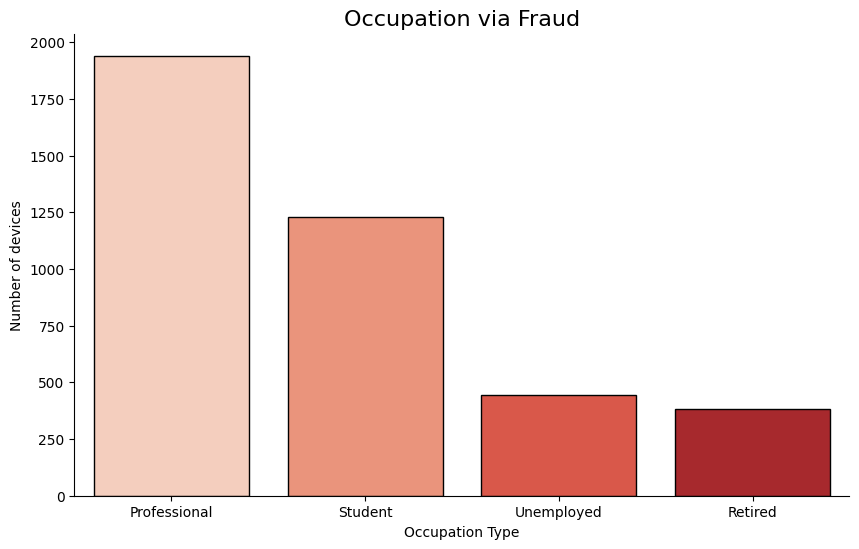

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=data[data['IsFraud'] == 1], palette = 'Reds', legend = False, edgecolor = 'black' )
plt.title('Occupation via Fraud', size = 16)
plt.xlabel('Occupation Type')
plt.ylabel('Number of devices')
sns.despine()
plt.show()

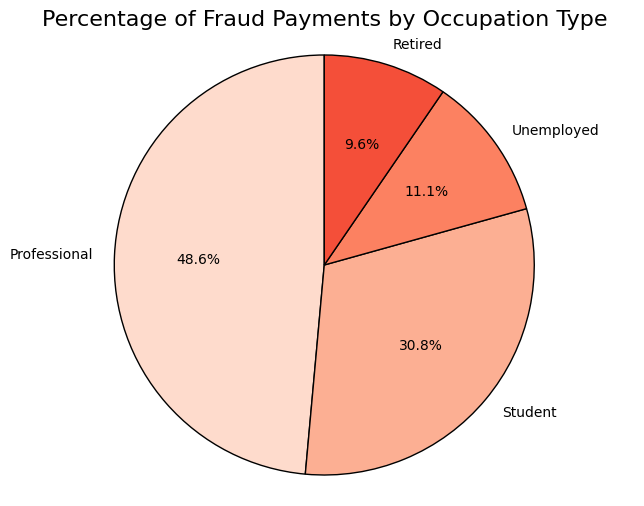

In [20]:
fraud_data = data[data['IsFraud'] == 1]

# Count the number of fraud payments by occupation type
occupation_cout = fraud_data['Occupation'].value_counts()

# Define the labels and sizes for the pie chart
labels = ['Professional', 'Student', 'Unemployed', 'Retired']
sizes = [
    occupation_cout.get('Professional', 0),
    occupation_cout.get('Student', 0),
    occupation_cout.get('Unemployed', 0), 
    occupation_cout.get('Retired', 0)

]


plt.figure(figsize=(8, 6))
palette_color = sns.color_palette('Reds')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=palette_color, explode=(0, 0, 0, 0),  wedgeprops={'edgecolor': 'black'} )
plt.title('Percentage of Fraud Payments by Occupation Type', size = 16)
plt.axis('equal')
plt.show()

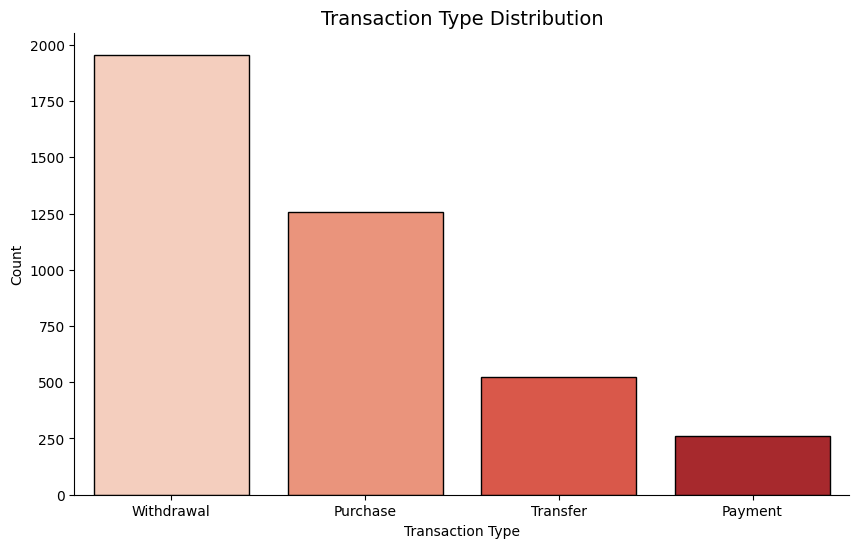

In [21]:
plt.figure(figsize=(10, 6))
fraud_data = data[data['IsFraud'] == 1]
trans_type = fraud_data['TransactionType'].value_counts()

# Use sns.barplot instead of sns.countplot
sns.barplot(x=trans_type.index, y=trans_type.values, palette='Reds', edgecolor='black')
plt.title('Transaction Type Distribution', size=14)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
sns.despine()
plt.show()

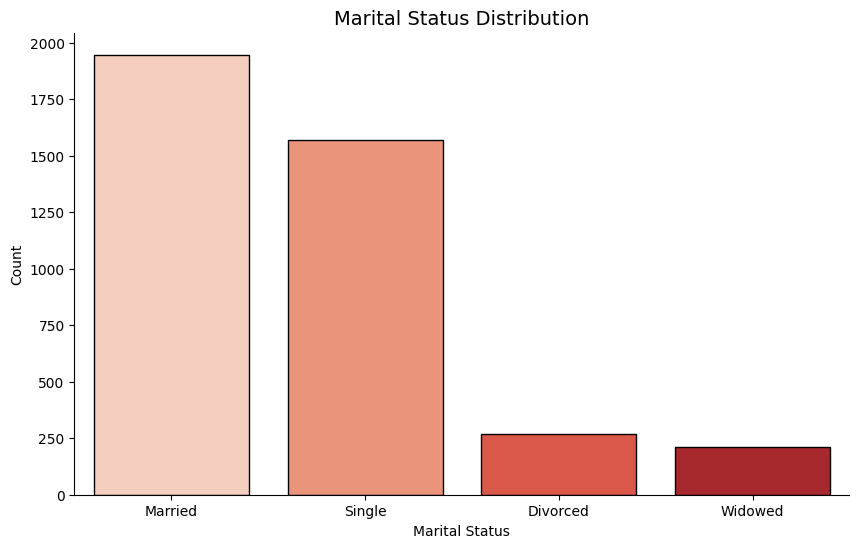

In [22]:
plt.figure(figsize = (10,6))
marital_type = fraud_data['MaritalStatus'].value_counts()

sns.barplot(x = marital_type.index, y = marital_type.values, palette = 'Reds', edgecolor = 'black')
plt.title('Marital Status Distribution', size=14)
plt.xlabel('Marital Status')
plt.ylabel('Count')
sns.despine()
plt.show()

### COMMENT: 
- The fun thing is most of scammers have proffesional background (nearly 2000 scammers are from professional background), followed by Student (approximately 1250 students made it).
- 48.6% of scammers have professional background, 30.8% of them are students, 11.1% are unemployed, and just 9.6% of them retired already
- Fraud Payment often made through Withdrawal 

In [23]:
# using one hot encoding 
dummy_columns = ['Occupation', 'MaritalStatus', 'TransactionType', 'DeviceType']

# Create dummy variables for the specified columns
data = pd.get_dummies(data, columns=dummy_columns)

# Convert the newly created dummy columns to integers
dummy_columns_new = data.filter(regex='Occupation_|MaritalStatus_|TransactionType_|DeviceType_').columns
data[dummy_columns_new] = data[dummy_columns_new].astype(int)


In [24]:
# print all the education level
data['EducationLevel'].value_counts()

EducationLevel
Bachelor       4367
High School    4331
Master         1641
PhD             627
Name: count, dtype: int64

In [25]:
# using ordinal encoding for ordinal categorical value (EducationLevel)
data['EducationLevel'].replace({'High School' : '0', 'Bachelor' : '1', 'Master' : '2', 'PhD' : '3'}, inplace = True)
data['EducationLevel'].value_counts()

EducationLevel
1    4367
0    4331
2    1641
3     627
Name: count, dtype: int64

In [26]:
# Change boolean into integer
data['Terrorism'].astype(int)

# Change income categories into 4 different groups 
data['Income_Cat'] = data['Income_Cat'].str.replace('Low', '0').str.replace('Medium','1').str.replace('Very High','3').str.replace('High', '2')

In [27]:
# Clean the 'Expenditure' column by removing currency symbols and unwanted characters
data['Expenditure'] = data['Expenditure'].replace({'AU\$': '', 'AUD': '', 'AED': '', ' ': ''}, regex=True)

# Convert the cleaned column to numeric values
data['Expenditure'] = pd.to_numeric(data['Expenditure'], errors='coerce')

In [28]:
GBP_to_AUD = 1.96  # Example rate: 1 GBP = 1.96 AUD
AED_to_AUD = 0.43  # Example rate: 1 AED = 0.43 AUD

# Function to change currency to AUD
def change_currency(n):
    n = str(n).strip()
    
    # Check if it's AUD
    if n.endswith('AUD') or n.startswith('AU$'):
        n = n.replace('AU$', '').replace('AUD', '').strip()
        try:
            n = float(n)
            return n  # Already in AUD, no need for further conversion
        except ValueError:
            return None  # If conversion to float fails
    
    # Check if it's GBP
    elif n.endswith('GBP') or '£' in n or '¬' in n:
        n = n.replace('GBP', '').replace('£', '').replace('¬', '').strip()
        try:
            n = float(n)
            return n * GBP_to_AUD  # Convert GBP to AUD
        except ValueError:
            return None  # If conversion to float fails
    
    # Check if it's AED
    elif n.startswith('AED'):
        n = n.replace('AED', '').strip()
        try:
            n = float(n)
            return n * AED_to_AUD  # Convert AED to AUD
        except ValueError:
            return None  # If conversion to float fails
    
    # Return None for unrecognized currencies or invalid inputs
    return None


In [29]:
data['GiftsTransaction'] = data['GiftsTransaction'].apply(change_currency)
data['TransactionAmount'] = data['TransactionAmount'].replace({'AU\$': '', 'AUD': '', 'AED': '', ' ': ''}, regex=True)

#### For TransactionDate, we should convert into 4 sepeate columns: Day, Month, Year, Date of the week 

In [30]:
# Convert TransactionDate to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Convert into 4 seperate columns
data['TransactionYear'] = data['TransactionDate'].dt.year
data['TransactionMonth'] = data['TransactionDate'].dt.month
data['TransactionDay'] = data['TransactionDate'].dt.day
data['TransactionDayOfWeek'] = data['TransactionDate'].dt.day_name()

data.drop(columns = ['TransactionDate'], inplace = True)


#### For TransactionTime, we just keep the hour

In [31]:
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'], errors = 'coerce')

# Conver into 1 column, just keep the hour 
data['TransactionHour'] = data['TransactionTime'].dt.hour

data.drop(columns = 'TransactionTime', inplace = True)

data['TransactionHour'].fillna(data['TransactionHour'].median(), inplace = True)

In [32]:
# drop MerchantID and EmailDomain
data.drop(columns = ['MerchantID', 'EmailDomain'], inplace = True)


## EXPLORATORY DATA ANALYSIS 

In [33]:
# descriptive statistic 
data.describe()

,TransactionNumber,UserID,Age,NumDependents,Income,Expenditure,GiftsTransaction,Latitude,Longitude,UserTenure,...,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,TransactionYear,TransactionMonth,TransactionDay,TransactionHour
count,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000,...,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000,10966.000000,10966.0,10966.000000,10966.000000,10966.000000
mean,9117.500091,2483.885282,34.712384,1.995714,71053.173947,50576.199906,6189.413904,-30.369046,141.269333,60.786157,...,0.496079,0.204633,0.196881,0.303210,0.594200,0.102590,2023.0,8.191045,16.338318,11.128670
std,5293.669640,1429.402615,9.666245,1.408035,31337.747245,37940.817796,5960.376527,6.949766,11.248668,34.254477,...,0.500007,0.403451,0.397660,0.459666,0.491069,0.303436,0.0,3.340404,8.779244,7.010223
min,1.000000,1.000000,18.000000,0.000000,5229.820000,3813.530000,4.174800,-41.640079,-112.026050,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000
25%,4516.250000,1253.000000,28.000000,1.000000,47117.830000,25789.200000,2190.297400,-37.020100,142.702789,31.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.0,6.000000,9.000000,5.000000
50%,9120.500000,2471.000000,34.000000,2.000000,66068.680000,39812.410000,4444.251000,-31.840233,144.964600,61.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2023.0,9.000000,17.000000,11.000000
75%,13710.750000,3727.000000,41.000000,3.000000,86905.020000,61171.030000,8125.709200,-25.042261,145.612793,90.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2023.0,11.000000,24.000000,17.000000
max,18277.000000,5000.000000,68.000000,4.000000,200354.470000,359723.080000,60150.400000,57.851580,149.012375,119.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2023.0,12.000000,31.000000,23.000000


In [34]:
# recheck if is there any null value 
data.columns[data.isnull().any()]

data.head()

,TransactionNumber,UserID,Age,EducationLevel,NumDependents,Income,Expenditure,GiftsTransaction,TransactionAmount,TransactionLocation,...,TransactionType_Transfer,TransactionType_Withdrawal,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,TransactionYear,TransactionMonth,TransactionDay,TransactionDayOfWeek,TransactionHour
0,8765,70,37,1,3,28884.43,14610.61,2058.0196,258.14,Adelaide,...,0,1,0,1,0,2023,3,12,Sunday,12.0
1,9645,3386,34,0,4,54919.07,39169.49,9740.6316,34.94,Canberra,...,0,1,0,1,0,2023,3,5,Sunday,18.0
2,1145,2971,25,2,2,74728.57,55873.76,2253.7060,323.82,Brisbane,...,0,0,0,1,0,2023,11,10,Friday,17.0
3,15308,2925,25,0,3,55712.62,89649.04,4335.7000,32.49,Darwin,...,0,0,0,1,0,2023,10,7,Saturday,11.0
4,14967,2339,38,0,4,53004.70,43601.02,4763.4800,1140.75,MLB,...,0,1,0,0,1,2023,9,22,Friday,18.0


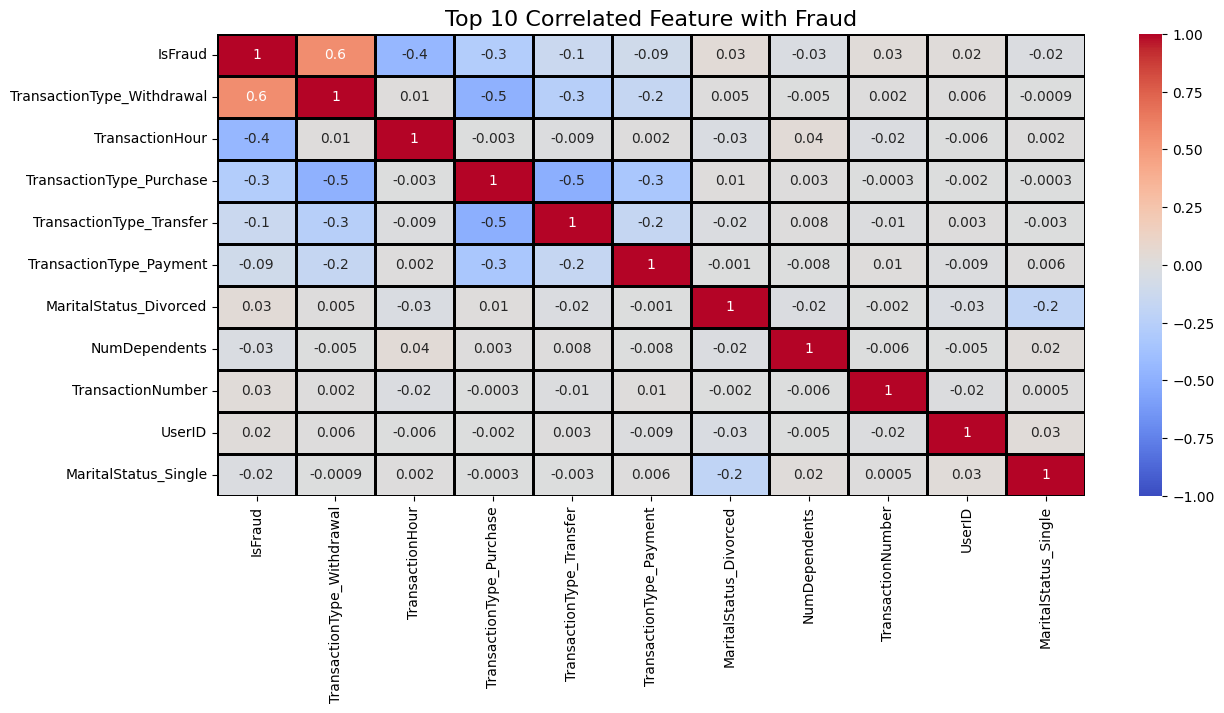

In [35]:
# heat map correlation between variables
numerical_columns = data.select_dtypes(include = ['int64', 'float64'])

corr_matrix = numerical_columns.corr()

# Sort the correlations with 'isFraud' and pick the top 10 most correlated columns
top_10_corr = corr_matrix['IsFraud'].abs().sort_values(ascending=False).head(11)  # including isFraud itself
top_10_columns = top_10_corr.index
top_10_corr_matrix = corr_matrix.loc[top_10_columns, top_10_columns]

# PLot the heat map
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(top_10_corr_matrix, annot = True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="coolwarm", linewidths=1, linecolor="black")
heatmap.set_title("Top 10 Correlated Feature with Fraud", size = 16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

#### Or we can have a table

In [36]:
print('Top 10 Correlation With Fraud')
print(top_10_corr)

Top 10 Correlation With Fraud
IsFraud                       1.000000
TransactionType_Withdrawal    0.557298
TransactionHour               0.446168
TransactionType_Purchase      0.274711
TransactionType_Transfer      0.138331
TransactionType_Payment       0.093825
MaritalStatus_Divorced        0.032624
NumDependents                 0.027305
TransactionNumber             0.026396
UserID                        0.016719
MaritalStatus_Single          0.016038
Name: IsFraud, dtype: float64


#### Comment: 
- The heatmap and table above shows the top 10 correlation between Fraud with other variables. 
- Generally, we can see that TransactionType_Withdrawal has the strongest correlation with Fraud payment (0.6). 
- Following by TransactionHour (0.5) and TransactionType_Purchase(0.3)


# VISUALIZATION

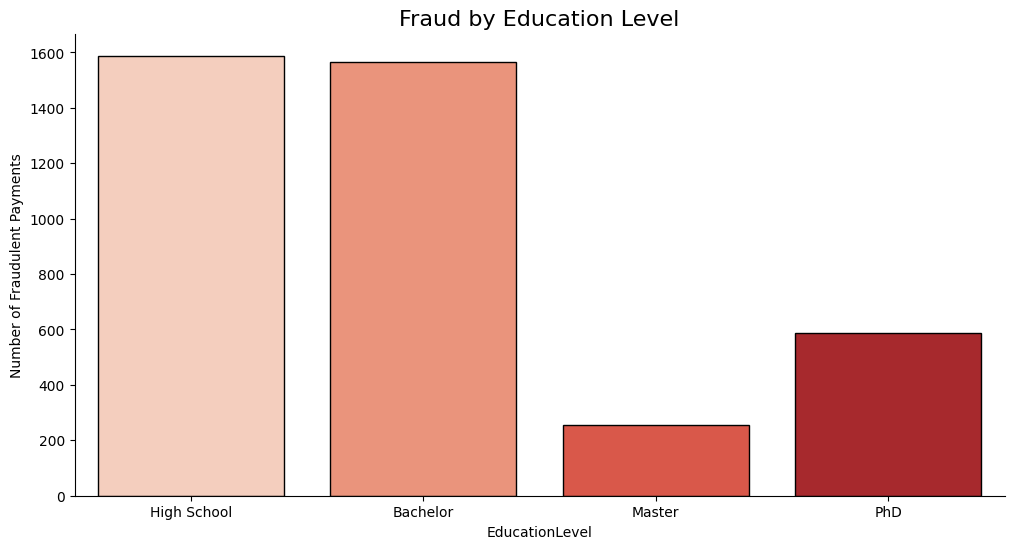

In [37]:
# Just pick fraud payment 
fraud_data = data[data['IsFraud'] == 1]
plt.figure(figsize=(12, 6))


sns.countplot(x='EducationLevel', data=fraud_data, palette='Reds', legend = False, edgecolor = 'black')
plt.xticks([0, 1, 2, 3], ['High School', 'Bachelor', 'Master', 'PhD'])
plt.ylabel('Number of Fraudulent Payments')
plt.title('Fraud by Education Level', size=16)
sns.despine()
plt.show()

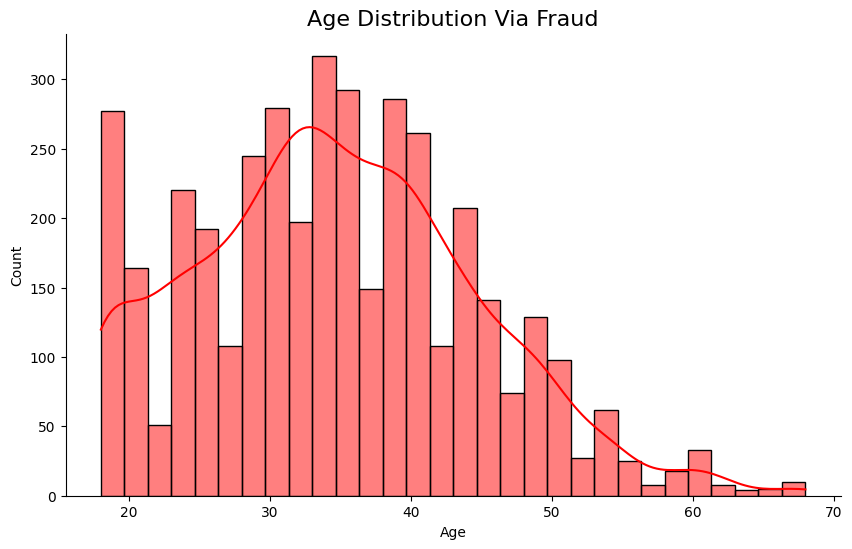

In [38]:
plt.figure(figsize = (10,6))
sns.histplot(data[data['IsFraud'] == 1]['Age'], color = 'r', label = 'Fraud', kde = True, bins = 30)
plt.title('Age Distribution Via Fraud', size = 16)
sns.despine()

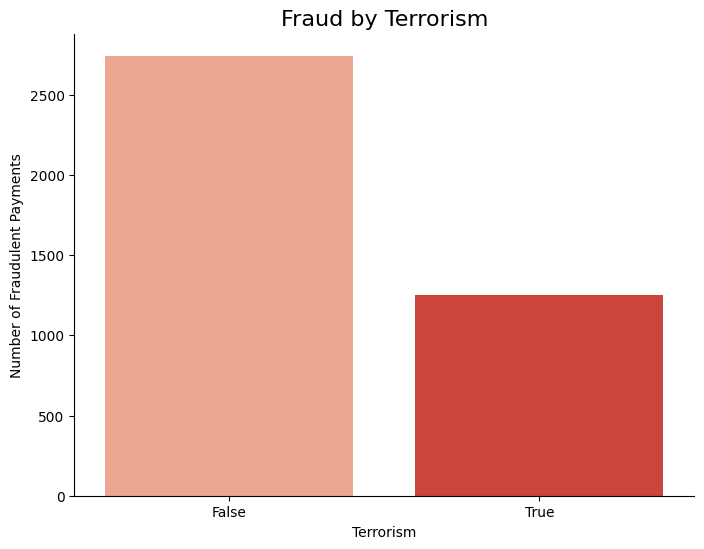

In [39]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Terrorism', data = data[data['IsFraud'] == 1],palette='Reds', legend = False)
plt.ylabel('Number of Fraudulent Payments')
plt.title('Fraud by Terrorism', size=16)
sns.despine()
plt.show()

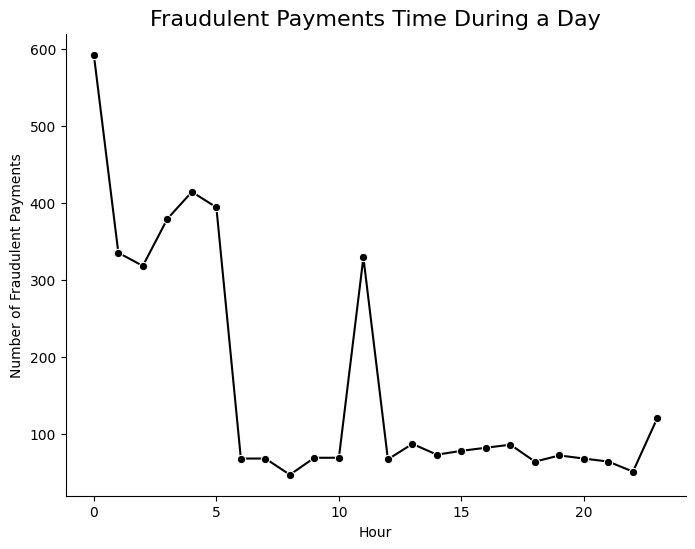

In [40]:
hourly_fraud_payments = fraud_data['TransactionHour'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x=hourly_fraud_payments.index, y=hourly_fraud_payments.values, marker='o', color='black')
plt.title('Fraudulent Payments Time During a Day', size=16)
plt.xlabel('Hour')
plt.ylabel('Number of Fraudulent Payments')
sns.despine()
plt.show()

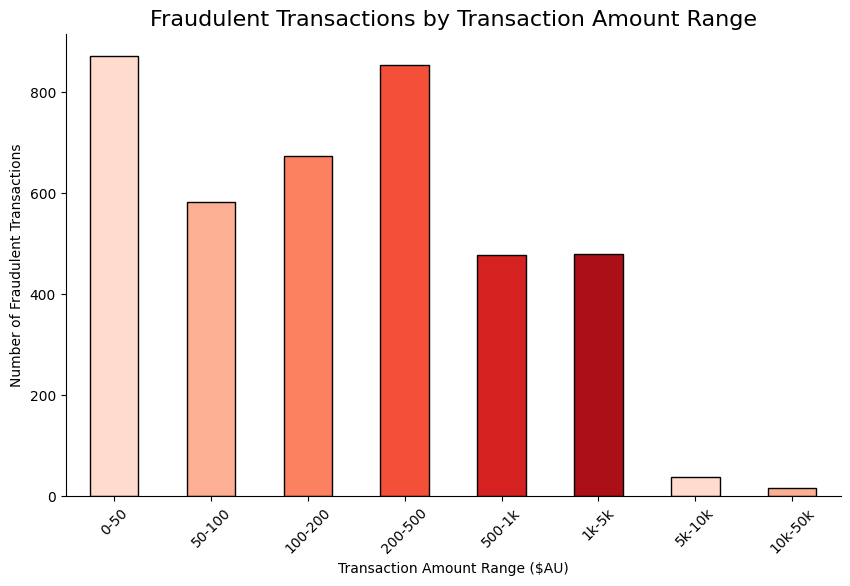

In [41]:
fraud_data['TransactionAmount'] = pd.to_numeric(fraud_data['TransactionAmount'], errors='coerce')
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000]
bin_labels = ['0-50', '50-100', '100-200', '200-500', '500-1k', '1k-5k', '5k-10k', '10k-50k']

fraud_data['TransactionAmountRange'] = pd.cut(
    fraud_data['TransactionAmount'], bins=bins, labels=bin_labels, include_lowest=True
)

fraud_counts = fraud_data.groupby('TransactionAmountRange')['TransactionAmount'].count()

plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('Reds')
fraud_counts.plot(kind='bar', color=palette_color, edgecolor='black')
plt.title('Fraudulent Transactions by Transaction Amount Range', size=16)
plt.xlabel('Transaction Amount Range ($AU)')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation = 45)
sns.despine()
plt.show()


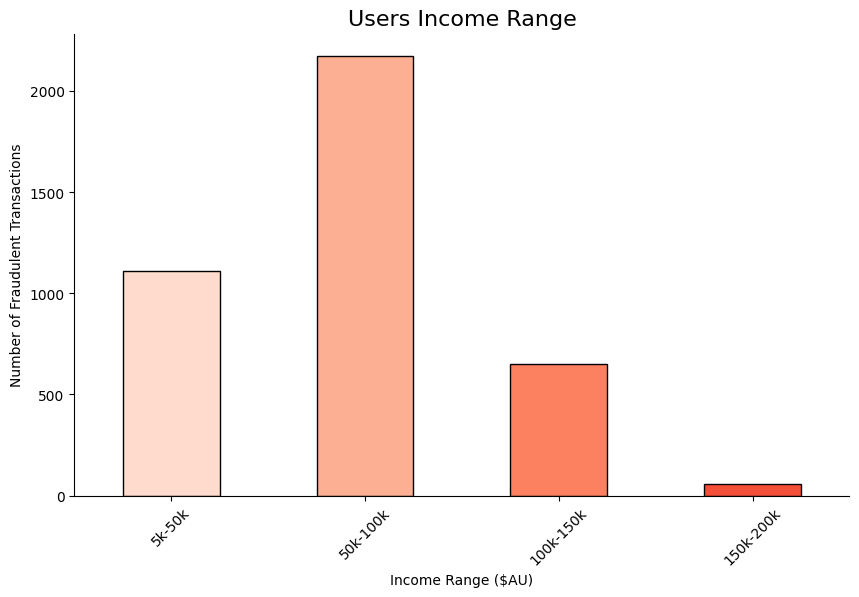

In [42]:

bins = [ 5000, 50000, 100000, 150000, 200000]
bin_labels = ['5k-50k', '50k-100k', '100k-150k', '150k-200k']

fraud_data['IncomeRange'] = pd.cut(
    fraud_data['Income'], bins=bins, labels=bin_labels, include_lowest=True
)

fraud_counts = fraud_data.groupby('IncomeRange')['Income'].count()

plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('Reds')
fraud_counts.plot(kind='bar', color=palette_color, edgecolor='black')
plt.title('Users Income Range', size=16)
plt.xlabel('Income Range ($AU)')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation = 45)
sns.despine()
plt.show()


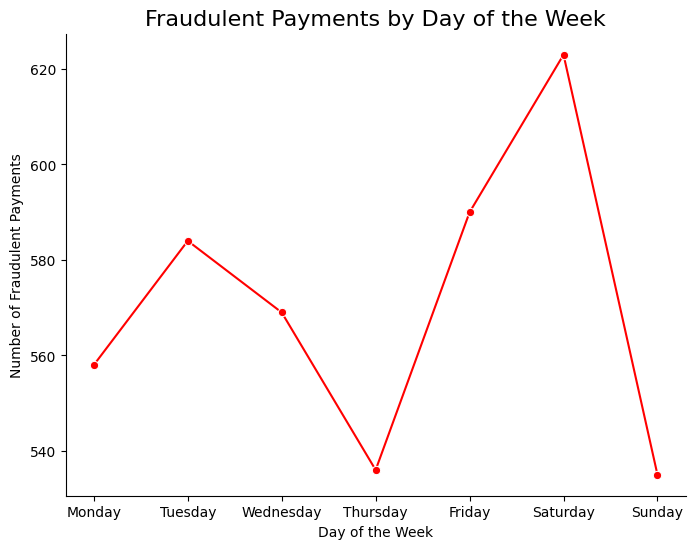

In [43]:
# Reorder the days of the week to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_payment = fraud_data['TransactionDayOfWeek'].value_counts().reindex(ordered_days)

# Plot the data
plt.figure(figsize=(8, 6))
sns.lineplot(x=day_payment.index, y=day_payment.values, marker='o', color='r')
plt.title('Fraudulent Payments by Day of the Week', size=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudulent Payments')
sns.despine()
plt.show()


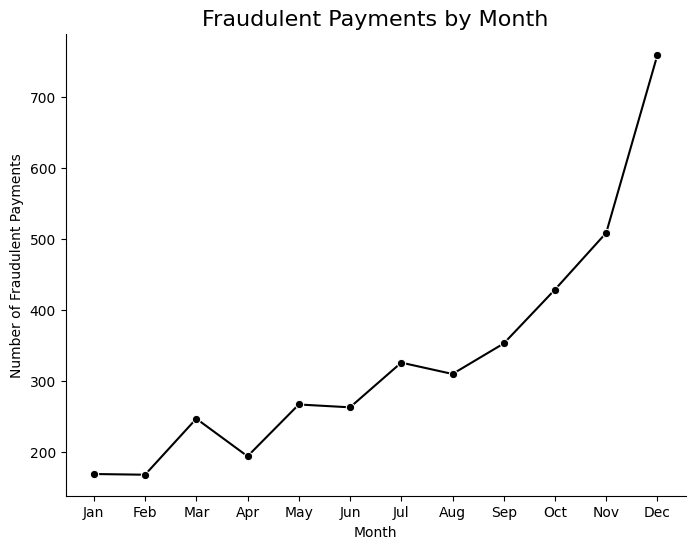

In [44]:
# Map numerical months to their abbreviations
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
fraud_data['TransactionMonth'] = fraud_data['TransactionMonth'].map(month_map)

# Reorder and count fraudulent payments by month
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month = fraud_data['TransactionMonth'].value_counts().reindex(month_order, fill_value=0)

# Plot the data
plt.figure(figsize=(8, 6))
sns.lineplot(x=month.index, y=month.values, marker='o', color='black')
plt.title('Fraudulent Payments by Month', size=16)
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Payments')
sns.despine()
plt.show()


### COMMENT: 
- **Most of the fraud makers are in high school and bachelor education levels:** The first chart shows that individuals with high school and bachelor degrees are the most involved in fraudulent activities, with very few fraudsters at the master or PhD level.

- **Scammers are mostly in the age range of 29 to 35 years old:** The second chart indicates that a large portion of fraudulent activities is carried out by individuals in their late 20s to mid-30s, with fewer fraud cases as age increases.

- **Most fraudulent payments are not related to terrorism:** The third chart suggests that most fraudulent activities are unrelated to terrorism, with a larger number of frauds labeled as "False" for terrorism-related flags.

- **Most fraudulent payments were made during late-night hours (0:00 to 3:00 am):** The fourth chart highlights that the peak of fraudulent payments occurs late at night, with a notable drop after 3:00 am and fewer incidents during the day.

## LOGISTIC REGRESSION

In [45]:
# import the package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE

In [46]:
X  = data.drop(columns = ['TransactionNumber', 'UserID', 'IsFraud', 'TransactionLocation', 'TransactionDayOfWeek'] )
Y = data['IsFraud']

# Train and test the model 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=142)

print('The shape of training set: ', X_train.shape)
print('The shape of testing set: ', X_test.shape)

The shape of training set:  (8772, 33)
The shape of testing set:  (2194, 33)


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# standardize the numerical value
numerical_columns = data.select_dtypes(include = ['number']).columns.tolist()
numerical_columns = [column for column in numerical_columns if column not in["TransactionNumber","UserID", "IsFraud"]] # because we do not include in model
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Train logisic regression model 
logreg = LogisticRegression(max_iter= 2000)
logreg.fit(X_train, Y_train)

# Test the model on both training and testing data set 
Y_train_pred = logreg.predict(X_train)
Y_test_pred = logreg.predict(X_test)

# Calculate accuracy score and F1 score 
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
train_f1 = f1_score(Y_train, Y_train_pred)
test_f1 = f1_score(Y_test,Y_test_pred)

print("Accuracy score for testing data: " , test_accuracy )
print("F1 score for testing data: " , test_f1 )
print("Accuracy score for training data: " , train_accuracy)
print("F1 score for training data: " , train_f1)

Accuracy score for testing data:  0.8701002734731085
F1 score for testing data:  0.823965410747375
Accuracy score for training data:  0.8846329229366166
F1 score for training data:  0.8408805031446541


### NOTE: 
- Accuracy score measures the proportion of correctly classified instances out out of total instances.
- F1 score gives a more comprehensive evaluation, it combines the precision and recall scores of a model  

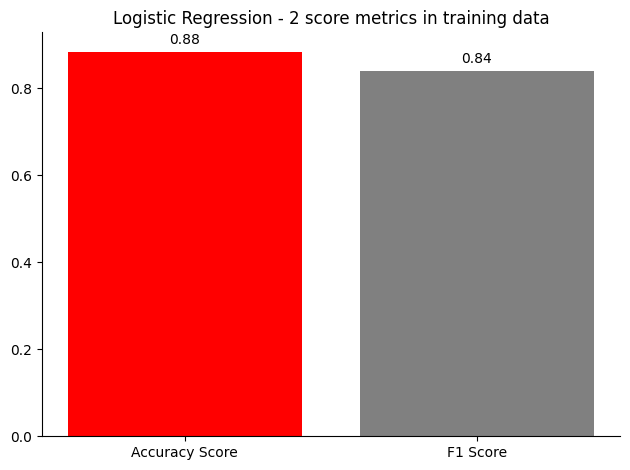

In [48]:
# Visualize the 2 score metrics 
train_metric = [train_accuracy, train_f1]
label = ['Accuracy Score', 'F1 Score']


plt.bar(label, train_metric, color =  ['red', 'gray'])
plt.title('Logistic Regression - 2 score metrics in training data')

for i, v in enumerate(train_metric):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

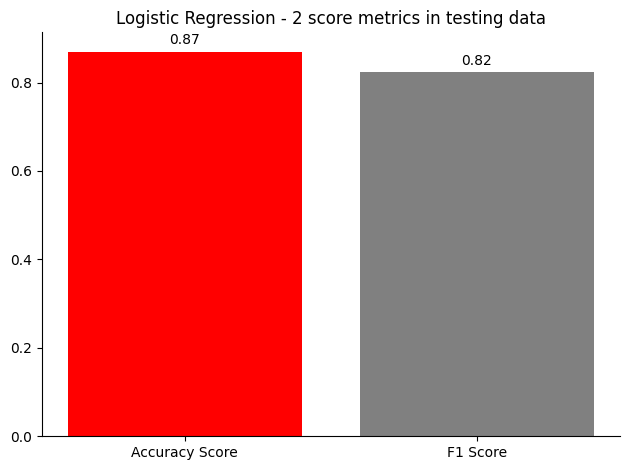

In [49]:
# Visualize the 2 score metrics 
test_metric = [test_accuracy, test_f1]
label = ['Accuracy Score', 'F1 Score']

plt.bar(label, test_metric, color =  ['red', 'gray'])
plt.title('Logistic Regression - 2 score metrics in testing data')

for i, v in enumerate(test_metric):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

### COMMENT: 
- In general, the accuracy score and F1 score in both training and testing data set are quite similar. 
- For training data, the accuracy is 0.88 and F1 score is 0.84
- For testing data, the accuracy is 0.86 and F1 score is 0.81 
- The small difference between them suggests that model is not overfitting and generalize well unseen data.

### Perform Recursive Feature Elimination (RFE) to identify effective features for building model

In [50]:
rfe = RFE(logreg, n_features_to_select= int(0.85*data.shape[1])) # Keep 85% of total data
rfe_model = rfe.fit(X_train, Y_train)

print('Number of features', rfe_model.n_features_)
print('Selected features', rfe_model.support_)
print('Features ranking', rfe_model.ranking_)

Number of features 32
Selected features [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True]
Features ranking [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]


In [51]:
# Array to store the value 
accuracy_scores = []
f1_scores = []
num_features_retained = []

# Iterate through different number of retained features 
for n_features_to_select in range(1, X_train.shape[1] +1, 5):
    rfe = RFE(logreg, n_features_to_select = n_features_to_select)
    rfe.fit(X_train, Y_train)
    
    # Predict on testing data 
    Y_rfe_pred = rfe.predict(X_test)

    # Compute accuracy and F1 score
    accuracy = accuracy_score(Y_test, Y_rfe_pred)
    f1 = f1_score(Y_test, Y_rfe_pred)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Store the number of retained features and performance metrics
    num_features_retained.append(n_features_to_select)

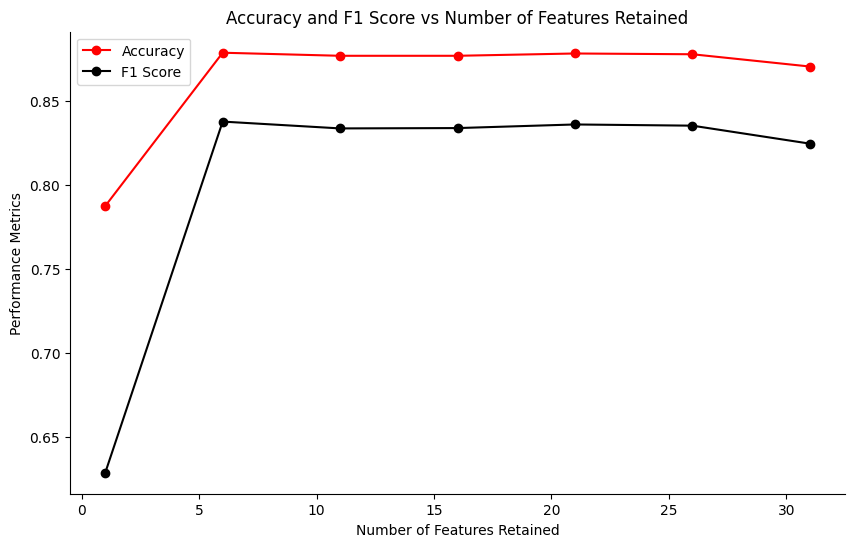

In [52]:
# Visualize performance metric
plt.figure(figsize=(10, 6))
plt.plot(num_features_retained, accuracy_scores, label='Accuracy', marker='o', color='r')
plt.plot(num_features_retained, f1_scores, label='F1 Score', marker='o', color='black')
plt.xlabel('Number of Features Retained')
plt.ylabel('Performance Metrics')
plt.title('Accuracy and F1 Score vs Number of Features Retained')
plt.legend(loc = 'best')
sns.despine()
plt.show()

### COMMENT: 
- Based on the graph, we can see that the accuracy score and F1 score peaked at around 6 features retained.
- After that, it stands stable at around 0.88 for accuracy score and 0.82 for F1 score. 
- In my opinion, I would prefer to retain 6 features.

In [53]:
rfe_optimal = RFE(logreg, n_features_to_select=6)
rfe_optimal.fit(X_train, Y_train)

# Get the retain features 
retained_features = rfe_optimal.support_
print("The retained features are: ", X_train.columns[retained_features])

The retained features are:  Index(['Gender_Female', 'TransactionType_Payment', 'TransactionType_Purchase',
       'TransactionType_Transfer', 'TransactionType_Withdrawal',
       'TransactionHour'],
      dtype='object')


## K Nearst Classification Model 

#### Build 1 NN Classifier 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Build and train the model 
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train, Y_train)

# Predict on testing data 
Y_test_pred_KNN =  KNN_model.predict(X_test)

# Calculate the 2 metrics score 
test_accuracy_KNN = accuracy_score(Y_test, Y_test_pred_KNN)
test_f1_KNN = f1_score(Y_test,Y_test_pred_KNN)
print(f"Accuracy on testing data: {test_accuracy_KNN}")
print(f"F1-Score on testing data: {test_f1_KNN}")

# Predict on training data
Y_train_pred_KNN =  KNN_model.predict(X_train)

# Calculate the 2 metrics score 
train_accuracy_KNN = accuracy_score(Y_train, Y_train_pred_KNN)
train_f1_KNN = f1_score(Y_train,Y_train_pred_KNN)
print(f"Accuracy on training data: {train_accuracy_KNN}")
print(f"F1-Score on training data: {train_f1_KNN}")

Accuracy on testing data: 0.6736554238833181
F1-Score on testing data: 0.52832674571805
Accuracy on training data: 1.0
F1-Score on training data: 1.0


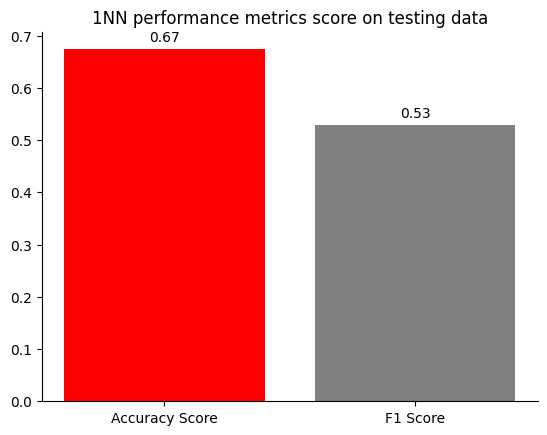

In [55]:
# Visualize for test data
test_metric = [test_accuracy_KNN, test_f1_KNN]
labael = ['Accuracy Score', 'F1 Score']

plt.bar(label, test_metric, color =  ['red', 'gray'])
plt.title('1NN performance metrics score on testing data')
for i, v in enumerate(test_metric):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.show()

### COMMENT: 
- The bar chart above shows the accuracy score and f1 score for the model using KNN with K = 1. 
- The accuracy score is 67%, which is a moderate score. It suggests that the model is making correct predictions for around 2/3 of the test 
- The F1 score is 53%, it is much lower than accuracy score, indicating that the model struggling to correctly classify the positive class. 
- Since K = 1, the model is likely to overfiiting, as KNN with low K often captures noise in data, reducing generalization.  

### Grid Search and Cross Validation Techniques
- Now we need to use these 2 techniques to tuning and evaluation. 
- **Grid Search** is a technique to find the optimal hyperparameters for a model by exhaustively searching through a predefined set of hyperparameters. The model will try every combinations of hyperparameters and selects the one that produce the best performance. 
- **Cross Validation** helps in evaluating the performance of the model by splitting data into multiple fold. The model will be trained in multiple folds and test on remained folds, providing a more reliable model performance range. 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# Define the parameter grid: search K from 1 to 30 
param_grid = {'n_neighbors': range(1, 31)}

# Perform grid search with 5 fold cross validation 
grid_search = GridSearchCV(KNN_model, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, Y_train)
# Get the best number of K 

best_k = grid_search.best_params_['n_neighbors']
best_KNN = grid_search.best_estimator_
print('Best number of K(neighbors)', best_k)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best number of K(neighbors) 11
Best cross-validated accuracy: 0.7293656501866309


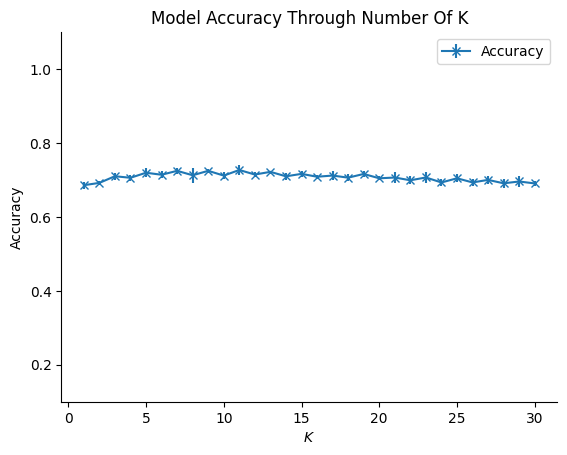

In [57]:
cv_scores = []
cv_scores_std = []
k_range = range(1, 31)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=KFold(n_splits=5, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Model Accuracy Through Number Of K')
sns.despine()
plt.show()

### Comment: The best K = 11 with the best accuracy score is 0.73

In [58]:
# Calculate the 2 scores metrics with K = 11
# Predict on testing data 
Y_test_pred_KNN =  best_KNN.predict(X_test)

# Calculate the 2 metrics score 
test_accuracy_KNN = accuracy_score(Y_test, Y_test_pred_KNN)
test_f1_KNN = f1_score(Y_test,Y_test_pred_KNN)
print(f"Accuracy on testing data: {test_accuracy_KNN}")
print(f"F1-Score on testing data: {test_f1_KNN}")

# Predict on training data
Y_train_pred_KNN =  best_KNN.predict(X_train)

# Calculate the 2 metrics score 
train_accuracy_KNN = accuracy_score(Y_train, Y_train_pred_KNN)
train_f1_KNN = f1_score(Y_train,Y_train_pred_KNN)
print(f"Accuracy on training data: {train_accuracy_KNN}")
print(f"F1-Score on training data: {train_f1_KNN}")

Accuracy on testing data: 0.7096627164995443
F1-Score on testing data: 0.4908073541167066
Accuracy on training data: 0.7834017327861377
F1-Score on training data: 0.6261314443132625


### Comment: 
- Now, the accuracy score is improved from 0.67 (when K = 1) to 0.71 (when K = 11). However, the F1 score decreased from 0.53 (when K = 1) to 0.49 (when K = 11).

### Now, let's try to using GridSearch CV again but this time, we just use 6 features retained from RFE

In [59]:
selected_features = X_train.columns[rfe_optimal.support_]

# Just train model based of 6 features remained 
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(X_train_selected.shape)
print(X_test_selected.shape)

(8772, 6)
(2194, 6)


In [60]:
# Perform grid search with 5 fold cross validation 
grid_search = GridSearchCV(KNN_model, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_selected, Y_train)
# Get the best number of K 

best_k = grid_search.best_params_['n_neighbors']
best_KNN = grid_search.best_estimator_
print('Best number of K(neighbors)', best_k)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Calculate the 2 scores metrics with K = 11
# Predict on testing data 
Y_test_pred_KNN =  best_KNN.predict(X_test_selected)

# Calculate the 2 metrics score 
test_accuracy_KNN = accuracy_score(Y_test, Y_test_pred_KNN)
test_f1_KNN = f1_score(Y_test,Y_test_pred_KNN)
print(f"Accuracy on testing data: {test_accuracy_KNN}")
print(f"F1-Score on testing data: {test_f1_KNN}")

# Predict on training data
Y_train_pred_KNN =  best_KNN.predict(X_train_selected)

# Calculate the 2 metrics score 
train_accuracy_KNN = accuracy_score(Y_train, Y_train_pred_KNN)
train_f1_KNN = f1_score(Y_train,Y_train_pred_KNN)
print(f"Accuracy on training data: {train_accuracy_KNN}")
print(f"F1-Score on training data: {train_f1_KNN}")

Best number of K(neighbors) 23
Best cross-validated accuracy: 0.9236204751370088
Accuracy on testing data: 0.9161349134001823
F1-Score on testing data: 0.8948571428571429
Accuracy on training data: 0.9236206110351117
F1-Score on training data: 0.9010047281323877


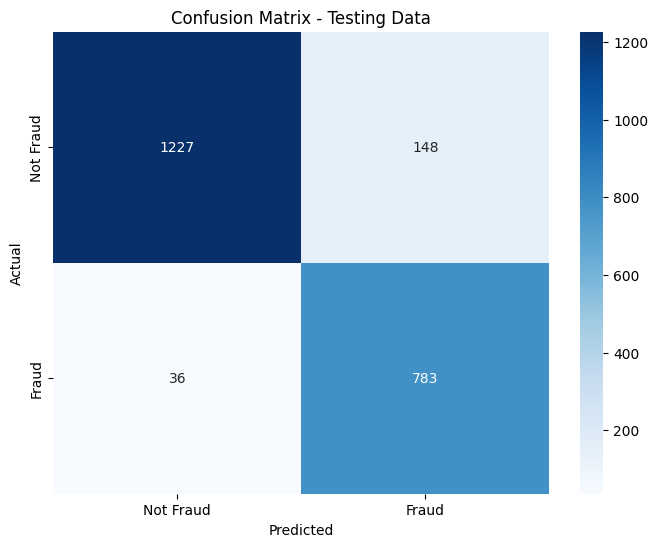

In [72]:
# generate confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_train = confusion_matrix(Y_train, Y_train_pred_KNN)
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred_KNN)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

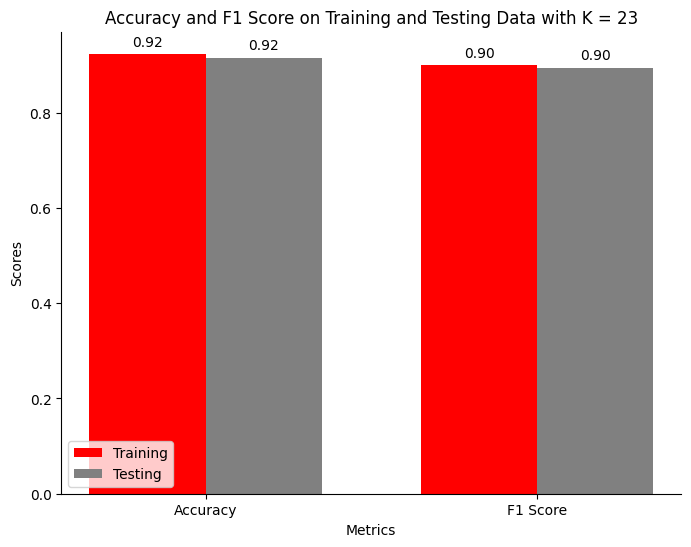

In [61]:
import numpy as np
categories = ['Accuracy', 'F1 Score']
testing_scores = [0.916, 0.895]  
training_scores = [0.924, 0.901]  

# Number of categories (Accuracy and F1 Score)
n = len(categories)

# Define the positions of the bars on the x-axis
ind = np.arange(n) 
width = 0.35        

plt.figure(figsize=(8, 6))
bars1 = plt.bar(ind, training_scores, width, label='Training', color='red')
bars2 = plt.bar(ind + width, testing_scores, width, label='Testing', color='gray')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Accuracy and F1 Score on Training and Testing Data with K = 23')
plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
    
sns.despine()
plt.show()

#### COMMENT: 
The model's performance has significantly improved after selecting the top 6 features through Recursive Feature Elimination (RFE) and applying them in conjunction with GridSearchCV for hyperparameter tuning. 

**Previous Model Performance:**
- Testing Accuracy: 0.70
- F1 Score: 0.49
- Best K (Neighbors): 11
- This suggests that the model had moderate predictive power but struggled with precision and recall, which led to a lower F1 score.

**Current Model Performance:**
- Testing Accuracy: 0.92
- F1 Score: 0.90
- Best K (Neighbors): 23
- The significant boost in accuracy and F1 score indicates that the model is now generalizing better on unseen data, likely due to better feature selection and more optimal hyperparameters (K=23). The accuracy has improved by 22%, and the F1 score has dramatically increased, reflecting better balance between precision and recall.

## GAUSSIAN NAIVE BAYS 

In [62]:
from sklearn.naive_bayes import GaussianNB
GSNavie = GaussianNB()
GSNavie.fit(X_train, Y_train)

GaussianNB()

In [63]:
# Use the model to predict 
Y_test_pred_GS = GSNavie.predict(X_test)
Y_train_pred_GS = GSNavie.predict(X_train)

test_accuracy_GS = accuracy_score(Y_test_pred_GS, Y_test)
test_f1_GS = f1_score(Y_test_pred_GS, Y_test)
train_accuracy_GS = accuracy_score(Y_train_pred_GS, Y_train)
train_f1_GS = f1_score(Y_train_pred_GS, Y_train)

print('Accuracy on Testing Data:', test_accuracy_GS)
print('F1 Score On Testing Data:', test_f1_GS)
print('Accuracy on Training Data:', train_accuracy_GS)
print('F1 Score On Training Data:', train_f1_GS)

Accuracy on Testing Data: 0.7958067456700091
F1 Score On Testing Data: 0.6739446870451238
Accuracy on Training Data: 0.8084815321477428
F1 Score On Training Data: 0.6830188679245283


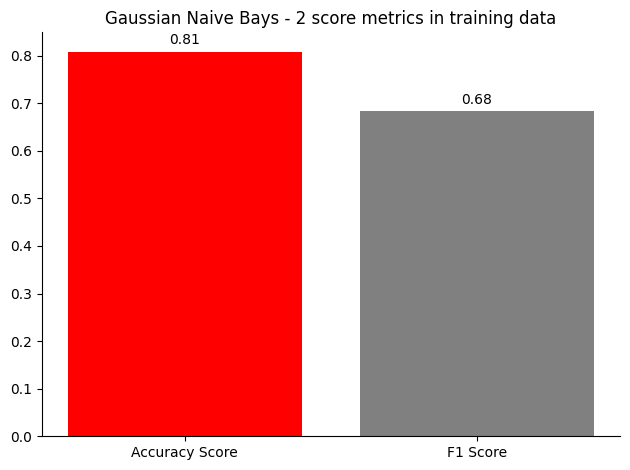

In [64]:
# Visualize the 2 score metrics 
train_metric = [train_accuracy_GS, train_f1_GS]
label = ['Accuracy Score', 'F1 Score']

plt.bar(label, train_metric, color =  ['red', 'gray'])
plt.title('Gaussian Naive Bays - 2 score metrics in training data')

for i, v in enumerate(train_metric):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()

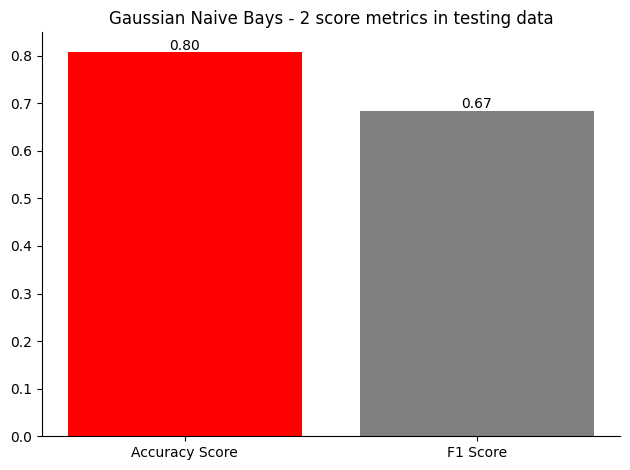

In [65]:
# Visualize the 2 score metrics 
test_metric = [test_accuracy_GS, test_f1_GS]
label = ['Accuracy Score', 'F1 Score']

plt.bar(label, train_metric, color = ['red', 'gray'])
plt.title('Gaussian Naive Bays - 2 score metrics in testing data')

for i, v in enumerate(test_metric):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

In [66]:
print('Estimated probability of classess: \n', GSNavie.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', GSNavie.theta_)
print('Estimated variance for each Gaussian distribution: \n', GSNavie.var_)

Estimated probability of classess: 
 [0.6379389 0.3620611]
Estimated mean for each Gaussian distribution: 
 [[ 2.24099702e-03  8.59899929e-01  2.11376236e-02 -1.18458927e-02
  -9.58314966e-03 -8.46787073e-03  3.32560541e+02 -4.61412356e-03
   2.22338386e-03  2.99499643e-01 -4.84586721e-03  4.80879199e-01
   5.19120801e-01  1.49660472e+00  9.30644876e-03  3.40240211e-03
  -7.60167190e-03 -7.18521529e-03 -2.59728800e-02  3.19256763e-03
   1.46489040e-02 -1.32194128e-02  7.06045703e-02  2.07584012e-01
   1.04630407e-01 -4.21789068e-01  5.81385914e-03 -9.61135456e-03
   6.72526283e-03  0.00000000e+00  3.43917930e-02  6.54255389e-03
   3.33848962e-01]
 [-3.94855771e-03  8.77204030e-01 -3.72437473e-02  2.08720452e-02
   1.68851717e-02  1.49200896e-02  5.98321990e+02  8.12992300e-03
  -3.91752396e-03  3.11712846e-01  8.53824713e-03  4.79219144e-01
   5.20780856e-01  1.51605793e+00 -1.63976345e-02 -5.99491253e-03
   1.33938778e-02  1.26600960e-02  4.57632986e-02 -5.62519159e-03
  -2.58108523e-

In [67]:
# Use 10-fold cross validation to show a more robust prediction accuracy
scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy mean: %.4f; std: %.4f\n' % (scores.mean(), scores.std()))

Gaussian Naive Bayes accuracy mean: 0.6948; std: 0.0061



### COMMENT: 
**Accuracy Score**
- Training Accuracy: 80.8%
- Testing Accuracy: 79.6%
- The model performs fairly well, with a small drop in accuracy from training to testing data, indicating minimal overfitting and reasonable generalization to unseen data.

**F1 Score**
- Training F1 Score: 0.683
- Testing F1 Score: 0.674
- The F1 scores are lower than the accuracy, suggesting that the model may have some difficulty balancing precision and recall, potentially due to class imbalance or challenges in correctly classifying certain categories. Overall, the model is performing consistently across both the training and testing datasets.

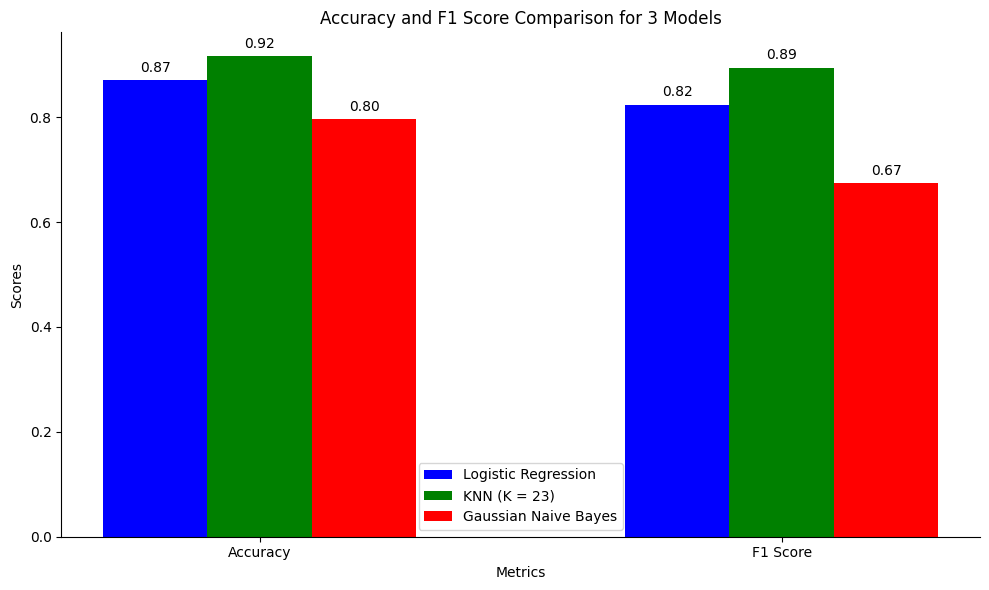

In [69]:
categories = ['Accuracy', 'F1 Score']
Logistic = [test_accuracy, test_f1]  
KNN = [test_accuracy_KNN, test_f1_KNN]  
GS = [test_accuracy_GS, test_f1_GS]


n = len(categories)

# Define the positions of the bars on the x-axis
ind = np.arange(n) 
width = 0.2  # for the bar 

plt.figure(figsize=(10, 6))
bars1 = plt.bar(ind - width, Logistic, width, label='Logistic Regression', color='b')
bars2 = plt.bar(ind, KNN, width, label='KNN (K = 23)', color='g')
bars3 = plt.bar(ind + width, GS, width, label='Gaussian Naive Bayes', color='r')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Accuracy and F1 Score Comparison for 3 Models')
plt.xticks(ind, categories)
plt.legend(loc='best')

# For logistic 
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# For KNN
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# For Gaussian Naive Bayes
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


### COMMENT: 
- This chart compares the performance of Logistic Regression, K-Nearest Neighbors (KNN) with K = 23, and Gaussian Naive Bayes models on two metrics: Accuracy and F1 Score.
- **K-Nearest Neighbors (K = 23)** stands out as the best-performing model, with an Accuracy of 0.92 and an F1 Score of 0.90. This indicates that the model predicts well on unseen data, balancing both precision and recall effectively.
- **Logistic Regression** also performs well, with an Accuracy of 0.87 and an F1 Score of 0.82, but it falls short compared to KNN.
- **Gaussian Naive Bayes** has the lowest performance among the three models, with an Accuracy of 0.80 and an F1 Score of 0.67. This suggests that while it makes reasonable predictions, it struggles more with balancing precision and recall, leading to a lower F1 score.

## CONCLUSION

### Fraudsters and fraudulent transactions tend to share the following characteristics:
- Most transactions are conducted through mobile devices.
- Fraudulent activities are concentrated late at night (12:00 AM to 3:00 AM) and during weekends (Friday to Saturday).
- Most of fraudulent transactions are of the withdrawal type.
- Fraud transaction amounts are typically flexible, ranging from $0 to $500, with only a small proportion exceeding $5,000.
- Fraudsters are primarily aged between 30 and 40 years old.

### Key Factors and Considerations for Improving Fraud Detection:
1) Focus on late night transactions:
- Fraudulent activities are more likely to occur during late-night hours (e.g., 12:00 AM to 3:00 AM).
- Implement stricter monitoring during these hours to detect unusual or suspicious transactions more effectively.
2) Limit High Transaction Amounts:
- Set transaction amount thresholds and require additional verification (e.g., three-sign authorization or multi-factor authentication) for transactions exceeding a significant limit.
- This reduces the risk of large-scale fraud and adds an extra layer of protection for high-value transactions.
3) Enhanced Monitoring for Withdrawal Payments:
- Withdrawals are a common transaction type for fraud.
- Introduce stricter scrutiny and advanced anomaly detection algorithms to flag unusual withdrawal patterns.

### Chosen model
- Using KNN with K = 23 gives this model the best performance to detect fraud payment